In [36]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from skmatter.decomposition import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"
plt.rcParams['font.family'] = 'arial'

random_state = 20
n_components = 2

In [37]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

RidgeClassifierCV()
LogisticRegressionCV(random_state=20)
LinearSVC(random_state=20)
Perceptron()


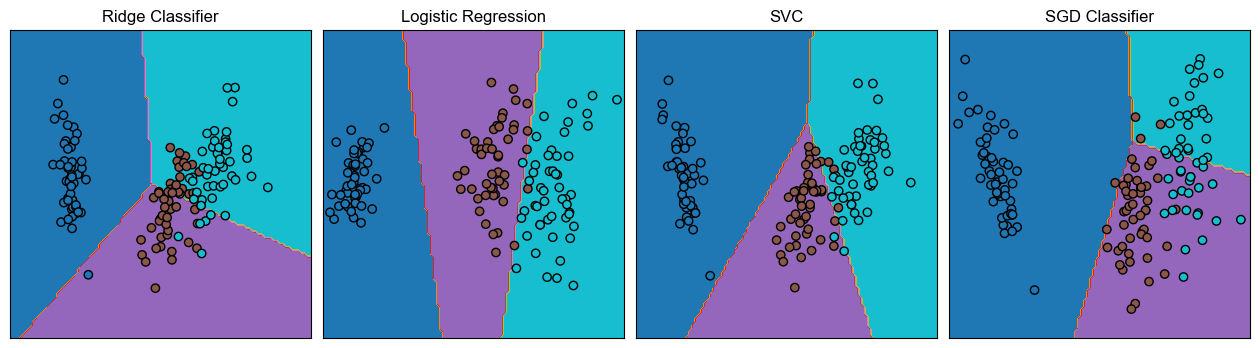

In [ ]:
mixing = 0.5
n_models = 4
fig, axes = plt.subplots(1, n_models, figsize=(4*n_models, 4))

models = {
    RidgeClassifierCV(): "Ridge Classifier",
    
    LogisticRegressionCV(
         random_state=random_state
    ): "Logistic Regression",

    LinearSVC(
         random_state=random_state
    ): "SVC", 

    Perceptron(
         random_state=2
    ): "SGD Classifier", 
}

for id, graph in enumerate(axes.flat):
     model = list(models)[id]
    
     pcovc = PCovC(
        mixing=mixing, 
        n_components=n_components, 
        random_state=random_state, 
        classifier=model,
     )

     pcovc.fit(X_scaled, y)
     T = pcovc.transform(X_scaled)
          
     graph = axes.flat[id]
     graph.set_title(models[model])
     
     DecisionBoundaryDisplay.from_estimator(
          estimator=pcovc.classifier_, 
          X=T, 
          ax=graph, 
          response_method="predict",
          #grid_resolution=2500, #comment this line to speed up processing
     )

     graph.scatter(T[:, 0], T[:, 1], c=y,)

     graph.set_xticks([])
     graph.set_yticks([])
     
fig.subplots_adjust(wspace=0.04)